Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Built the problem problem with assumptions:
coll A D X
coll B C D
eqangle A B A X A X A C
ncoll A B C
ncoll A B C X
npara B C A X

and goals:
eqratio A B A C B D C D

Using points:
A (0.4126714639001544, 0.5303261703377309)
B (0.9201678147586083, 0.6639432475191882)
C (0.5467821565428718, 1.2822640458094112)
D (0.768103307646572, 0.9157596881356558)
X (0.9315775435904479, 1.0930326335336749)

solved:  True


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


outtest\html\dependency_graph.html
# Problem setup:

## Points

- A(0.4127, 0.5303)
- B(0.9202, 0.6639)
- C(0.5468, 1.2823)
- D(0.7681, 0.9158)
- X(0.9316, 1.0930)

## Assumptions:

[C0] : B, C, D are collinear
[C1] : ∠(AB,AX) = ∠(AX,AC)
[C2] : A, D, X are collinear

## Numerical checks

[N0] : A ≠ D
[N1] : A ≠ X
[N2] : D ≠ X
[N3] : A, B, C are not collinear


# Goals

AB:AC = BD:CD : Proved [2]


# Proof:

000. | A, D, X are collinear [C2], A ≠ D [N0], A ≠ X [N1], D ≠ X [N2] =(r82 Parallel from collinear)> AD ∥ AX [0]
001. | ∠(AB,AX) = ∠(AX,AC) [C1], AD ∥ AX [0] =(AR Deduction)> ∠(AB,AD) = ∠(AD,AC) [1]
002. | B, C, D are collinear [C0], ∠(AB,AD) = ∠(AD,AC) [1], A, B, C are not collinear [N3] =(r12 Bisector theorem II)> AB:AC = BD:CD [2]


# Appendix: AR deductions:



001. | Angle Chasing to prove ∠(AB,AD) = ∠(AD,AC):
| Premise ∠(AB,AX) = ∠(AX,AC) gives a linear equation with coefficients {Âˆ AB: -1, Âˆ AC: -1, Âˆ AX: 2}
| Premise AD ∥ AX gives a linear equation with coefficients {Âˆ 

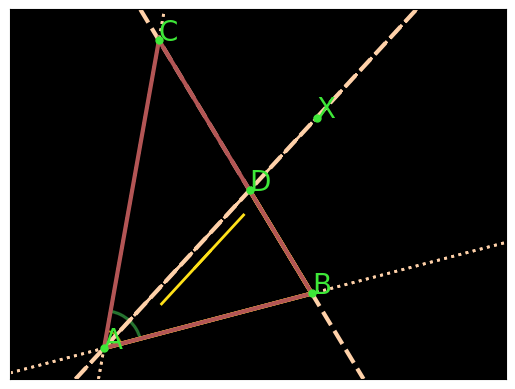

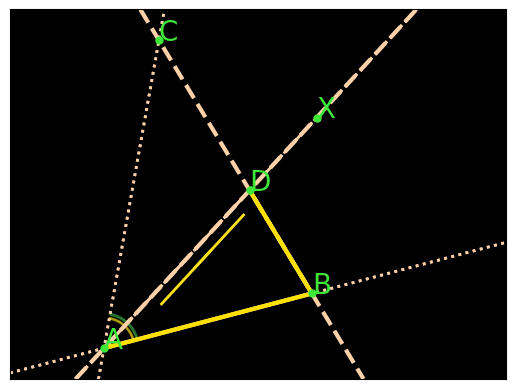

In [2]:
from pathlib import Path
from newclid import GeometricSolverBuilder
from newclid.problem import PredicateConstruction, ProblemSetup
from newclid.jgex.problem_builder import JGEXProblemBuilder
from newclid.jgex.formulation import JGEXFormulation
from newclid.api import PythonDefault
from py_yuclid.api_default import HEDefault

JGEX_PROBLEM = """A B C = triangle A B C;
X = angle_bisector X B A C;
D = intersection_ll D B C A X;
""".strip().replace('\n', ' ')
goals = [PredicateConstruction.from_str("eqratio B D D C A B A C")]


# Build a JGEX formulation into a ProblemSetup
jgex_problem = JGEXFormulation.from_text(JGEX_PROBLEM)
problem_builder = JGEXProblemBuilder(problem=jgex_problem, rng=0)
problem_setup = problem_builder.build()
problem = ProblemSetup(name=problem_setup.name,
                        points=problem_setup.points,
                        assumptions=problem_setup.assumptions,
                        goals=tuple(goals),
                        )
print(problem.pretty_str())
# Build a solver from the ProblemSetup
solver = GeometricSolverBuilder(api_default=HEDefault()
                                ).build(problem)

# Run deduction + algebraic reasoning
success = solver.run()
print("solved: ", success)

# Print proof (text form)
if success:
    solver.write_all_outputs(Path('outtest'), jgex_problem=problem_builder.jgex_problem)
    proof = solver.proof()
    print(proof)

# Optionally dump figure/proof artifacts
# solver.write_all_outputs("out_trapezoid_eqratio", jgex_problem=problem_builder.jgex_problem)